## Detektoren 08/2023

In [1]:
import pandas as pd

#Lesen der CSV
datei_pfad = 'det_val_hr_2023_08.csv'
df = pd.read_csv(datei_pfad)

df.head()

,detid_15;tag;stunde;qualitaet;q_kfz_det_hr;v_kfz_det_hr;q_pkw_det_hr;v_pkw_det_hr;q_lkw_det_hr;v_lkw_det_hr
0,100101010000167;01.08.2023;0;1.0;77;76;53;77;2...
1,100101010000167;01.08.2023;0;1.0;77;76;53;77;2...
2,100101010000167;01.08.2023;1;1.0;86;76;66;75;2...
3,100101010000167;01.08.2023;2;1.0;101;77;55;77;...
4,100101010000167;01.08.2023;3;1.0;164;77;109;77...


In [2]:
df = pd.read_csv(datei_pfad,sep=";")
df

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr
0,100101010000167,01.08.2023,0,1.00,77,76,53,77,24,74
1,100101010000167,01.08.2023,0,1.00,77,76,53,77,24,74
2,100101010000167,01.08.2023,1,1.00,86,76,66,75,20,77
3,100101010000167,01.08.2023,2,1.00,101,77,55,77,46,77
4,100101010000167,01.08.2023,3,1.00,164,77,109,77,55,78
...,...,...,...,...,...,...,...,...,...,...
275681,100101010093228,31.08.2023,19,0.75,124,20,120,20,3,21
275682,100101010093228,31.08.2023,20,1.00,127,29,125,29,2,38
275683,100101010093228,31.08.2023,21,0.92,117,26,115,26,2,28
275684,100101010093228,31.08.2023,22,1.00,89,30,88,30,1,33


In [20]:
# Spalten umbenennen - Vereinheitlichung mit Stammdaten
df = df.rename(columns={'detid_15': 'DET_ID15'})

df

,DET_ID15,tag,stunde,qualitaet,q_kfz_det_hr,q_pkw_det_hr,q_lkw_det_hr
0,100101010000167,01.08.2023,0,1.00,77,53,24
1,100101010000167,01.08.2023,0,1.00,77,53,24
2,100101010000167,01.08.2023,1,1.00,86,66,20
3,100101010000167,01.08.2023,2,1.00,101,55,46
4,100101010000167,01.08.2023,3,1.00,164,109,55
...,...,...,...,...,...,...,...
275681,100101010093228,31.08.2023,19,0.75,124,120,3
275682,100101010093228,31.08.2023,20,1.00,127,125,2
275683,100101010093228,31.08.2023,21,0.92,117,115,2
275684,100101010093228,31.08.2023,22,1.00,89,88,1


### Entfernen der Spalten mit der mittleren Geschwindigkeit der Fahrzeuge (KfZ, PKW und LKW)

In [4]:
# Entfernen von Spalten
df = df.drop(columns=['v_kfz_det_hr', 'v_pkw_det_hr', 'v_lkw_det_hr'])

df

,DET_ID15,tag,stunde,qualitaet,q_kfz_det_hr,q_pkw_det_hr,q_lkw_det_hr
0,100101010000167,01.08.2023,0,1.00,77,53,24
1,100101010000167,01.08.2023,0,1.00,77,53,24
2,100101010000167,01.08.2023,1,1.00,86,66,20
3,100101010000167,01.08.2023,2,1.00,101,55,46
4,100101010000167,01.08.2023,3,1.00,164,109,55
...,...,...,...,...,...,...,...
275681,100101010093228,31.08.2023,19,0.75,124,120,3
275682,100101010093228,31.08.2023,20,1.00,127,125,2
275683,100101010093228,31.08.2023,21,0.92,117,115,2
275684,100101010093228,31.08.2023,22,1.00,89,88,1


### Anzahl aller Kraftfahrzeuge in der Stunde ( im ganzen Monat...)

<module 'matplotlib.pyplot' from '/Users/lisa/ikt_venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

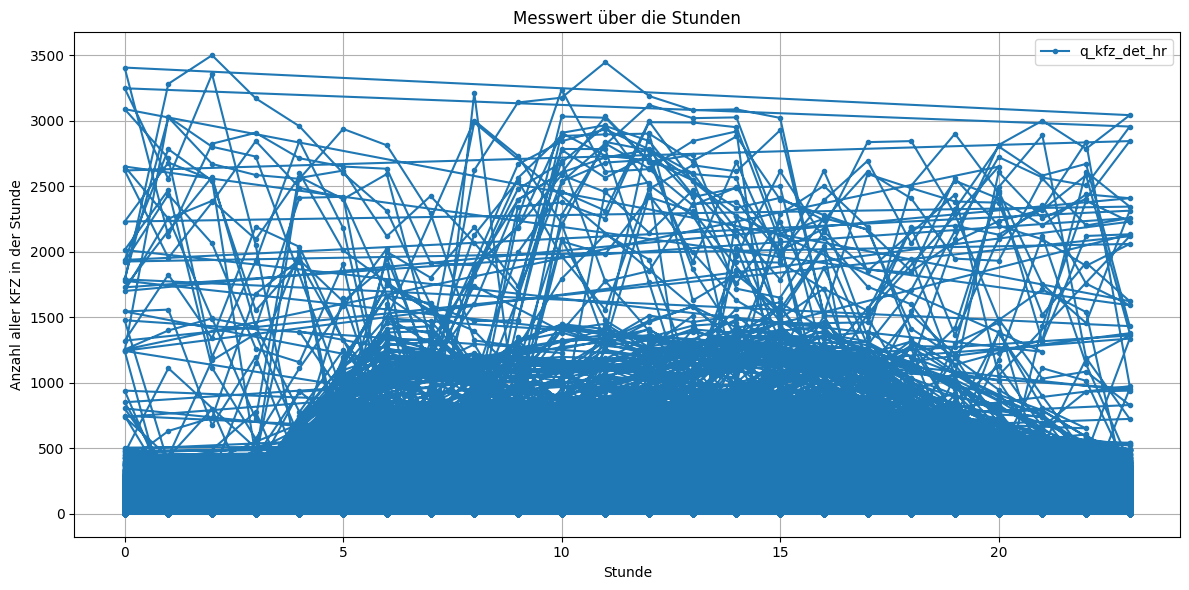

In [19]:
import matplotlib.pyplot as plt

# Plotten der Spalte 'q_kfz_det_hr' gegen 'Stunde'
plt.figure(figsize=(12, 6))
plt.plot(df['stunde'], df['q_kfz_det_hr'], marker='.',  label='q_kfz_det_hr')

# Titel und Achsenbeschriftungen
plt.title('Messwert über die Stunden')
plt.xlabel('Stunde')
plt.ylabel('Anzahl aller KFZ in der Stunde')

# Gitter hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt

#### Anzeige der Fahrten an einem bestimmtem Tag

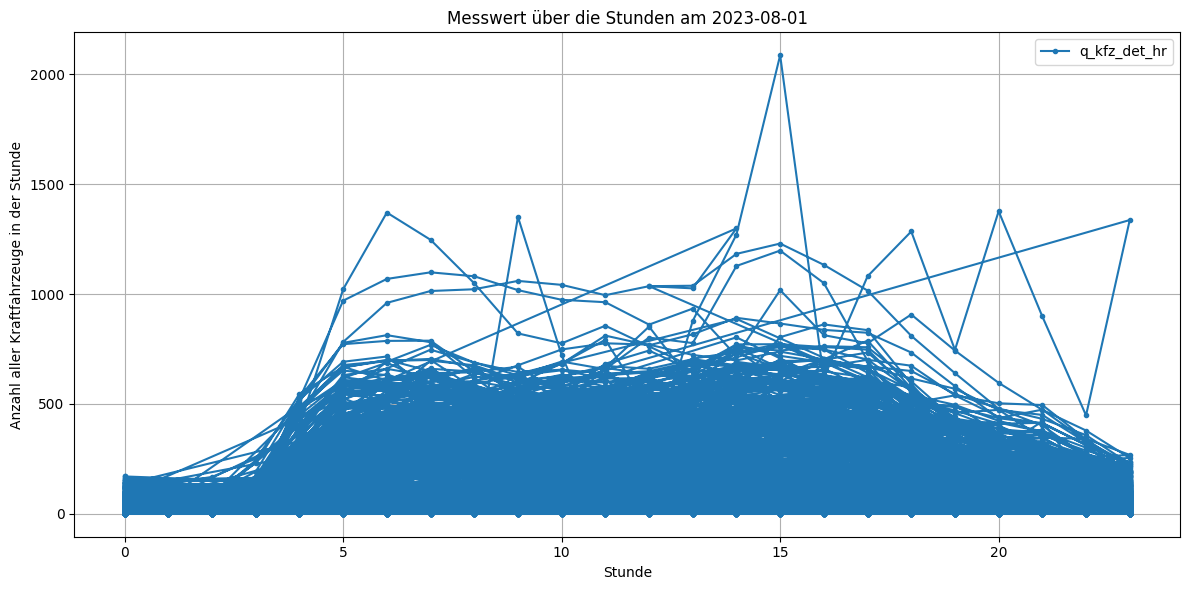

In [25]:
import matplotlib.pyplot as plt

# Annahme: df hat eine Spalte 'datum' mit Datumswerten und 'stunde' mit den Stundenwerten.
# Hier definieren wir den Tag, den wir anzeigen möchten
datum = '2023-08-01'  # Beispiel-Datum, ersetze dies durch den gewünschten Tag

# Filtern des DataFrames nach dem gewünschten Datum
df_filtered = df[df['tag'] == datum]

# Plotten der gefilterten Daten
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['stunde'], df_filtered['q_kfz_det_hr'], marker='.', label='q_kfz_det_hr')

# Titel und Achsenbeschriftungen
plt.title(f'Messwert über die Stunden am {datum}')
plt.xlabel('Stunde')
plt.ylabel('Anzahl aller Kraftfahrzeuge in der Stunde')

# Gitter hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt.show()

#### Anzeige der Fahrten in der Woche 01.08.2023 - 07.08.2023

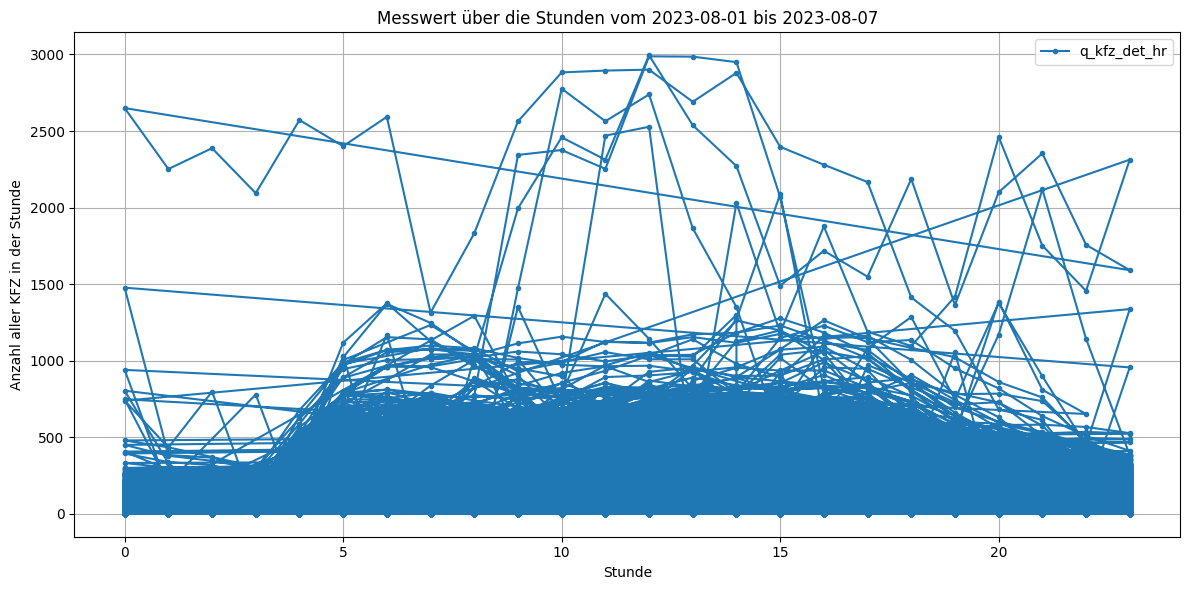

In [23]:
# Annahme: df hat eine Spalte 'tag' mit Datumswerten und 'stunde' mit den Stundenwerten.
# Definieren des Startdatums
start_datum = '2023-08-01'  # Startdatum, ersetze dies durch das gewünschte Startdatum
start_datum = pd.to_datetime(start_datum, format='%Y-%m-%d')

# Berechnen des Enddatums (7 Tage nach dem Startdatum)
end_datum = start_datum + pd.Timedelta(days=6)

# Konvertieren der Datumsspalte zu datetime mit dem spezifischen Format
df['tag'] = pd.to_datetime(df['tag'], format='%d.%m.%Y')

# Filtern des DataFrames nach dem gewünschten Datumsbereich
df_filtered = df[(df['tag'] >= start_datum) & (df['tag'] <= end_datum)]

# Plotten der gefilterten Daten
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['stunde'], df_filtered['q_kfz_det_hr'], marker='.', label='q_kfz_det_hr')

# Titel und Achsenbeschriftungen
plt.title(f'Messwert über die Stunden vom {start_datum.date()} bis {end_datum.date()}')
plt.xlabel('Stunde')
plt.ylabel('Anzahl aller KFZ in der Stunde')

# Gitter hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt.show()

### Anzahl aller PKW in der Stunde (im ganzen Monat)

<module 'matplotlib.pyplot' from '/Users/lisa/ikt_venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

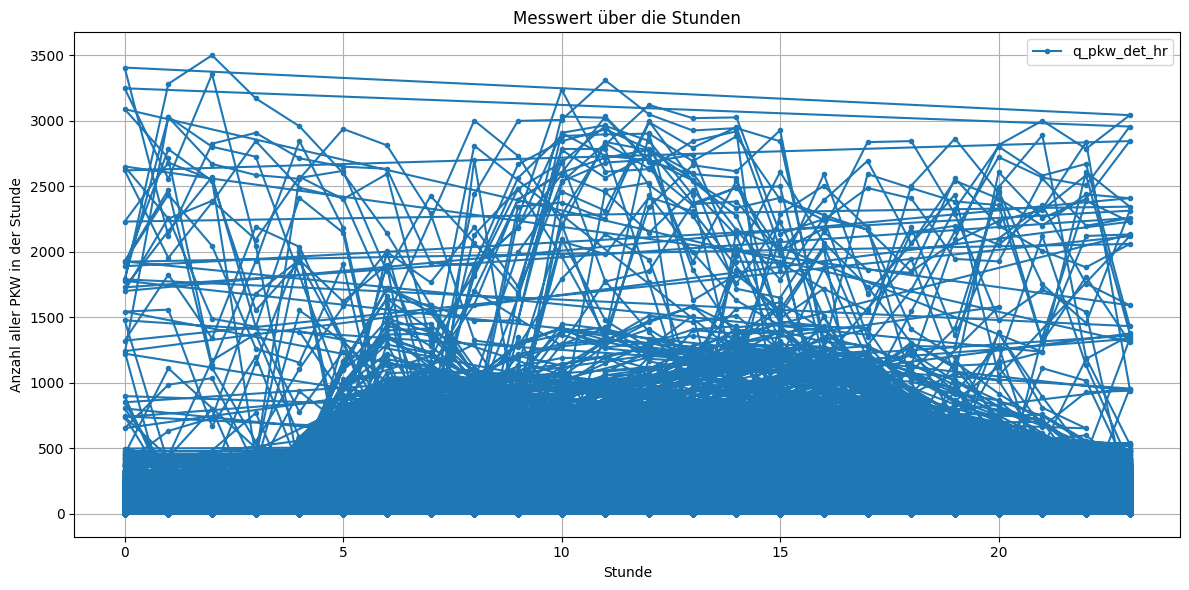

In [7]:
import matplotlib.pyplot as plt

# Plotten der Spalte 'q_pkw_det_hr' gegen 'Stunde'
plt.figure(figsize=(12, 6))
plt.plot(df['stunde'], df['q_pkw_det_hr'], marker='.',  label='q_pkw_det_hr')

# Titel und Achsenbeschriftungen
plt.title('Messwert über die Stunden')
plt.xlabel('Stunde')
plt.ylabel('Anzahl aller PKW in der Stunde')

# Gitter hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt

### Anzahl aller LKW in der Stunde

<module 'matplotlib.pyplot' from '/Users/lisa/ikt_venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

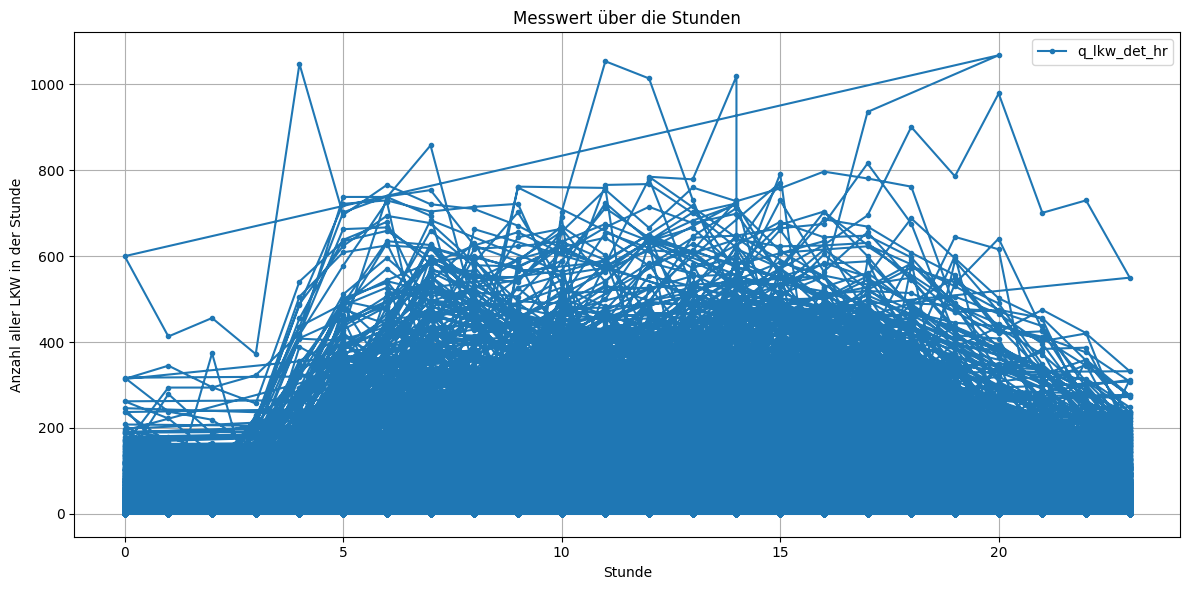

In [8]:
import matplotlib.pyplot as plt

# Plotten der Spalte 'q_lkw_det_hr' gegen 'Stunde'
plt.figure(figsize=(12, 6))
plt.plot(df['stunde'], df['q_lkw_det_hr'], marker='.',  label='q_lkw_det_hr')

# Titel und Achsenbeschriftungen
plt.title('Messwert über die Stunden')
plt.xlabel('Stunde')
plt.ylabel('Anzahl aller LKW in der Stunde')

# Gitter hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt